In [1242]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [1243]:
# Create Dataframes
df_train = pd.read_csv('Lab5_train.csv')
df_test = pd.read_csv('Lab5_test.csv')
df_combine = [df_train,df_test]

In [1244]:
# Getting Column Names
print(df_train.columns.values)

['PassengerID' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'ParCh'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [1245]:
# Analyzing Pclass
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.657895
1,2,0.412371
2,3,0.251521


In [1246]:
# Analyzing Sex
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.750000
1,male,0.187817


In [1247]:
# Analyzing Siblings and Spouse
df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.528302
2,2,0.400000
0,0,0.353407
3,3,0.307692
4,4,0.176471
5,5,0.000000
6,8,0.000000


In [1248]:
# Analyzing Parent Children
df_train[["ParCh", "Survived"]].groupby(['ParCh'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,ParCh,Survived
3,3,0.750000
1,1,0.614679
2,2,0.530864
0,0,0.338028
4,4,0.200000
5,5,0.000000
6,6,0.000000


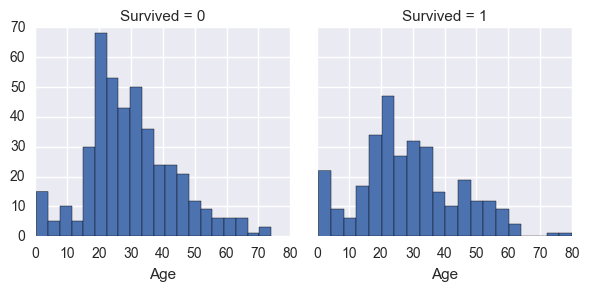

In [1249]:
# Age and Survive
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

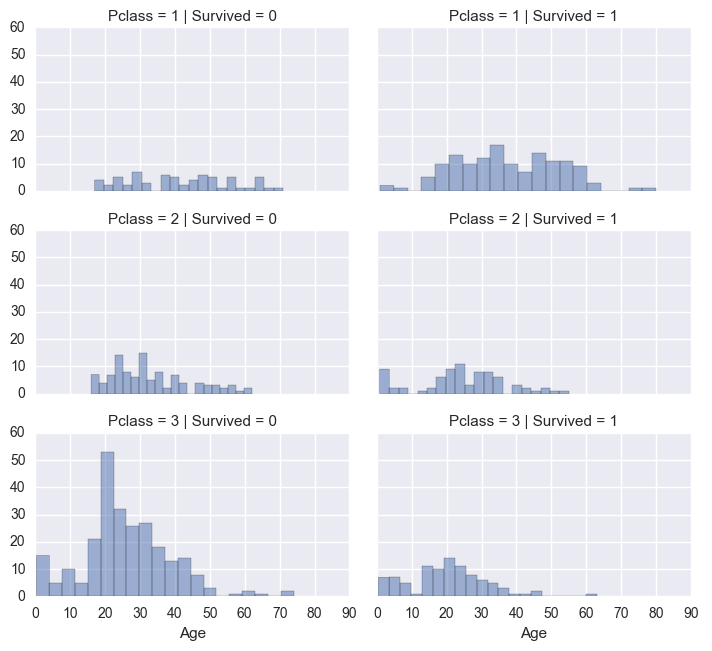

In [1250]:
# Pclass and Survival
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

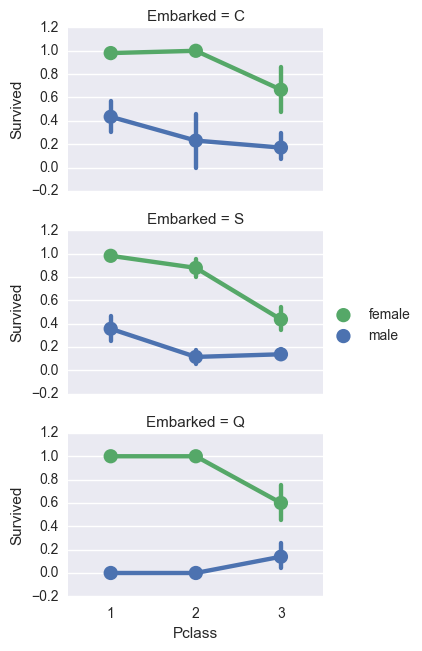

In [1251]:
# Sex, Embarked and Survived
grid = sns.FacetGrid(df_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [1252]:
# Create Title Feature
for dataset in df_combine:
    dataset['Title'] = dataset.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
pd.crosstab(df_train['Title'], df_train['Sex'])

# Convert odd titles to 'Rare'
for dataset in df_combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

# Convert categorial titles to ordinal
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in df_combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


In [1253]:
# Remove Name and PassengerID
df_train = df_train.drop(['Name', 'PassengerID'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
df_combine = [df_train, df_test]

In [1254]:
# Convert Sex to numerical values
for dataset in df_combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,45.5,0,0,2628,7.2250,NaN,C,1
1,0,2,0,37.0,1,0,SC/AH 29037,26.0000,NaN,S,1
2,0,3,0,19.0,0,0,349212,7.8958,NaN,S,1
3,0,2,1,57.0,0,0,S.O./P.P. 3,10.5000,E77,S,3
4,0,3,1,31.0,0,0,350407,7.8542,NaN,S,2


In [1255]:
# Populate Ages
guess_ages = np.zeros((2,3))
guess_ages

for dataset in df_combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_mean = guess_df.mean()
            age_std = guess_df.std()
            age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            #age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [1256]:
df_train['AgeBand'] = pd.cut(df_train['Age'], 20)
df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 4]",0.594595
1,"(4, 8]",0.562500
2,"(8, 12]",0.428571
3,"(12, 16]",0.586207
4,"(16, 20]",0.419753
5,"(20, 24]",0.431818
6,"(24, 28]",0.329268
7,"(28, 32]",0.377358
8,"(32, 36]",0.457143
9,"(36, 40]",0.155405


In [1257]:
bins = np.arange(4,81,4)
bins

array([ 4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68,
       72, 76, 80])

In [1258]:
# Convert Age to Age Bands
for dataset in df_combine:
    for i in np.arange(19):
        lower = bins[i]
        upper = bins[i+1]
        if (i != 19): dataset.loc[(dataset['Age'] > lower) & (dataset['Age'] <= upper), 'Age'] = i
        else: dataset.loc[(dataset['Age'] > lower)] = i
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,0,3,0,10,0,0,2628,7.2250,NaN,C,1,"(44, 48]"
1,0,2,0,8,1,0,SC/AH 29037,26.0000,NaN,S,1,"(36, 40]"
2,0,3,0,3,0,0,349212,7.8958,NaN,S,1,"(16, 20]"
3,0,2,1,13,0,0,S.O./P.P. 3,10.5000,E77,S,3,"(56, 60]"
4,0,3,1,6,0,0,350407,7.8542,NaN,S,2,"(28, 32]"


In [1259]:
df_train = df_train.drop(['AgeBand'], axis=1)
df_combine = [df_train, df_test]

In [1260]:
# Create Family Size feature
for dataset in df_combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['ParCh'] + 1

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.758621
2,3,0.557692
1,2,0.555556
4,5,0.333333
0,1,0.307829
6,7,0.272727
5,6,0.190476
7,8,0.000000
8,11,0.000000


In [1261]:
# Create No Family feature
for dataset in df_combine:
    dataset['NoFamily'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'NoFamily'] = 1

df_train[['NoFamily', 'Survived']].groupby(['NoFamily'], as_index=False).mean()

,NoFamily,Survived
0,0,0.512748
1,1,0.307829


In [1262]:
# Drop SibSp and ParCh
df_train = df_train.drop(['ParCh', 'SibSp'], axis=1)
df_test = df_test.drop(['ParCh', 'SibSp'], axis=1)
df_combine = [df_train, df_test]

df_train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize,NoFamily
0,0,3,0,10,2628,7.2250,NaN,C,1,1,1
1,0,2,0,8,SC/AH 29037,26.0000,NaN,S,1,2,0
2,0,3,0,3,349212,7.8958,NaN,S,1,1,1
3,0,2,1,13,S.O./P.P. 3,10.5000,E77,S,3,1,1
4,0,3,1,6,350407,7.8542,NaN,S,2,1,1


In [1263]:
# Populate Embarked feature
embark_array = df_train.Embarked.dropna().values
embark_array.sort()

for dataset in df_combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(embark_array[np.random.randint(0, len(embark_array)+1)])

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.566667
1,Q,0.366667
2,S,0.339535


In [1264]:
# Convert Embarked into numerical values
for dataset in df_combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
df_train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize,NoFamily
0,0,3,0,10,2628,7.2250,NaN,1,1,1,1
1,0,2,0,8,SC/AH 29037,26.0000,NaN,0,1,2,0
2,0,3,0,3,349212,7.8958,NaN,0,1,1,1
3,0,2,1,13,S.O./P.P. 3,10.5000,E77,0,3,1,1
4,0,3,1,6,350407,7.8542,NaN,0,2,1,1


In [1265]:
# Create New Fare
for dataset in df_combine:
    ticketName = dataset['Ticket'].unique()
    for name in ticketName:
        dataset.loc[dataset.Ticket == name,'Fare'] = dataset[dataset.Ticket == name].Fare/dataset[dataset.Ticket == name].Fare.count()
df_train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize,NoFamily
0,0,3,0,10,2628,7.2250,NaN,1,1,1,1
1,0,2,0,8,SC/AH 29037,26.0000,NaN,0,1,2,0
2,0,3,0,3,349212,7.8958,NaN,0,1,1,1
3,0,2,1,13,S.O./P.P. 3,5.2500,E77,0,3,1,1
4,0,3,1,6,350407,7.8542,NaN,0,2,1,1


In [1266]:
# Populate Empty Fare Sample
df_train.loc[df_train.Ticket == '3701','Fare'] = df_train[df_train.Pclass == 3].Fare.mean()

In [1267]:
# Drop Ticket and Cabin
df_train = df_train.drop(['Ticket', 'Cabin','NoFamily'], axis=1)
df_test = df_test.drop(['Ticket', 'Cabin','NoFamily'], axis=1)
df_combine = [df_train, df_test]
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,10,7.2250,1,1,1
1,0,2,0,8,26.0000,0,1,2
2,0,3,0,3,7.8958,0,1,1
3,0,2,1,13,5.2500,0,3,1
4,0,3,1,6,7.8542,0,2,1


In [1268]:
# Determine Correlations
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerID", axis=1).copy()

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

coeff_df = pd.DataFrame(df_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.113552
5,Title,0.541086
4,Embarked,0.093833
3,Fare,0.015579
2,Age,-0.137585
6,FamilySize,-0.251254
0,Pclass,-0.858329


In [1269]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

85.680000000000007

In [1270]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.340000000000003

In [1271]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.560000000000002

In [1272]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

72.790000000000006

In [1273]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.560000000000002

In [1274]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

61.310000000000002

In [1275]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

95.739999999999995

In [1276]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

95.739999999999995

In [1277]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,95.74
8,Decision Tree,95.74
1,KNN,86.34
0,Support Vector Machines,85.68
2,Logistic Regression,80.55
4,Naive Bayes,79.56
7,Linear SVC,79.56
5,Perceptron,72.79
6,Stochastic Gradient Decent,61.31


In [1278]:
submission = pd.DataFrame({
        "PassengerID": df_test["PassengerID"],
        "Survived": Y_pred
    })
submission.to_csv('/Users/Gideon/Desktop/submission2.csv', index=False)